In [1]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
from datasets import load_dataset
import numpy as np
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr.client import NumPyClient
from flwr.common import (
    Context, NDArrays, Scalar, ndarrays_to_parameters,
    parameters_to_ndarrays, EvaluateRes
)
from flwr.server import ServerApp, ServerConfig, ServerAppComponents
from flwr.server.strategy import FedProx
from flwr.simulation import run_simulation
from collections import OrderedDict
from typing import Dict, Tuple, List
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import cohen_kappa_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from flwr.server.client_proxy import ClientProxy
from flwr.common.logger import log
from logging import INFO

# Additional imports for plotting and data saving
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

DEBUG 2024-11-24 23:22:52,932:     Asyncio event loop already running.
DEBUG 2024-11-24 23:22:52,934:     Logger propagate set to False
DEBUG 2024-11-24 23:22:52,935:     Pre-registering run with id 11519996063675945265
DEBUG 2024-11-24 23:22:52,935:     Using InMemoryState
DEBUG 2024-11-24 23:22:52,936:     Using InMemoryState
DEBUG 2024-11-24 23:22:52,937:     Buffer time delay: 5s
INFO 2024-11-24 23:22:52,939:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:22:52,939:      
INFO 2024-11-24 23:22:52,940:      [INIT]
INFO 2024-11-24 23:22:52,941:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:22:52,941:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:22:52,941:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:22:52,942:      
INFO 2024-11-24 23:22:52,942:      [ROUND 1]



Running Scenario: Baseline_IID


DEBUG 2024-11-24 23:22:57,937:     Using InMemoryState
DEBUG 2024-11-24 23:22:57,938:     Registered 5 nodes
DEBUG 2024-11-24 23:22:57,939:     Supported backends: ['ray']
DEBUG 2024-11-24 23:22:57,939:     Initialising: RayBackend
DEBUG 2024-11-24 23:22:57,939:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 23:22:58,805	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 23:22:59,412:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 23:22:59,430:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:22:59,431:     Using InMemoryState
(ClientAppActor pid=1537474) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1537474)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 23:23:09,735:      aggreg

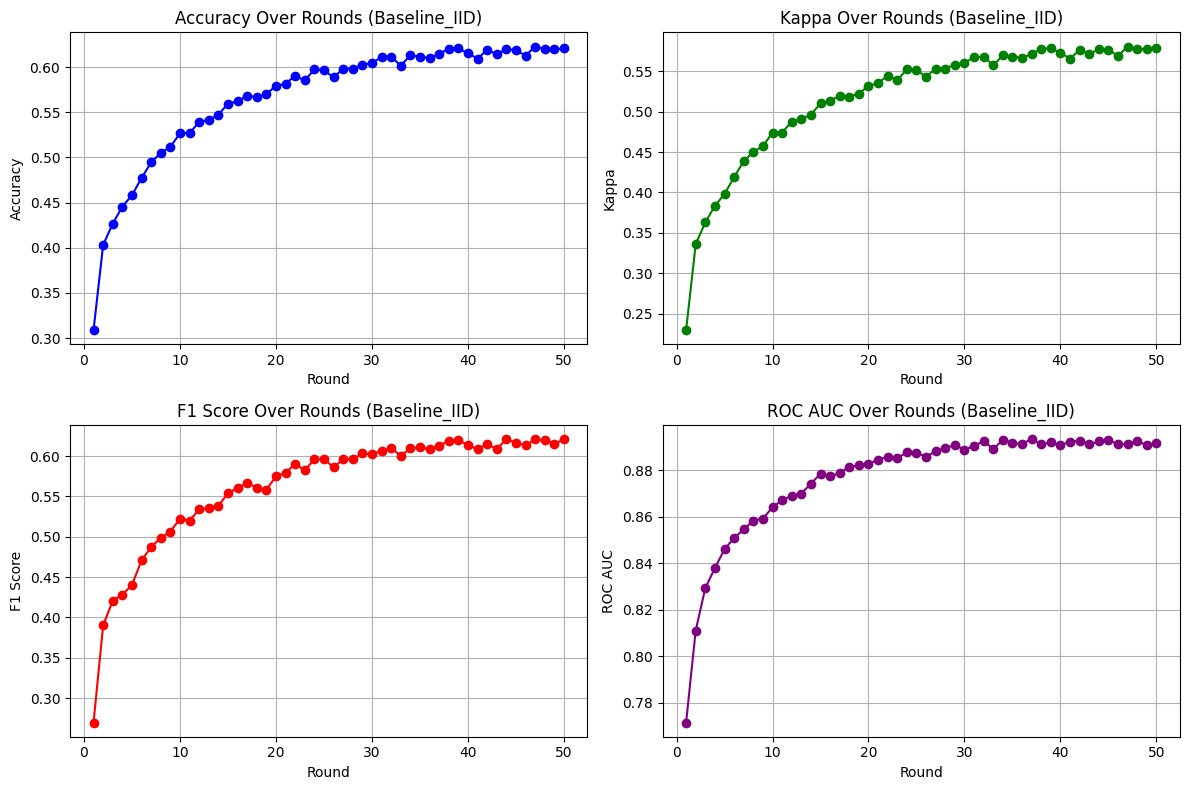

DEBUG 2024-11-24 23:29:32,857:     Asyncio event loop already running.
DEBUG 2024-11-24 23:29:32,858:     Logger propagate set to False
DEBUG 2024-11-24 23:29:32,859:     Pre-registering run with id 17569739910685913439
DEBUG 2024-11-24 23:29:32,859:     Using InMemoryState
DEBUG 2024-11-24 23:29:32,860:     Using InMemoryState
DEBUG 2024-11-24 23:29:32,861:     Buffer time delay: 5s
INFO 2024-11-24 23:29:32,864:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:29:32,864:      
INFO 2024-11-24 23:29:32,865:      [INIT]
INFO 2024-11-24 23:29:32,865:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:29:32,865:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:29:32,866:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:29:32,866:      
INFO 2024-11-24 23:29:32,866:      [ROUND 1]



Running Scenario: Baseline_NonIID


DEBUG 2024-11-24 23:29:37,862:     Using InMemoryState
DEBUG 2024-11-24 23:29:37,863:     Registered 5 nodes
DEBUG 2024-11-24 23:29:37,864:     Supported backends: ['ray']
DEBUG 2024-11-24 23:29:37,864:     Initialising: RayBackend
DEBUG 2024-11-24 23:29:37,865:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 23:29:38,716	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 23:29:39,324:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 23:29:39,340:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:29:39,341:     Using InMemoryState
(ClientAppActor pid=1546165) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1546165)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 23:29:49,745:      aggreg

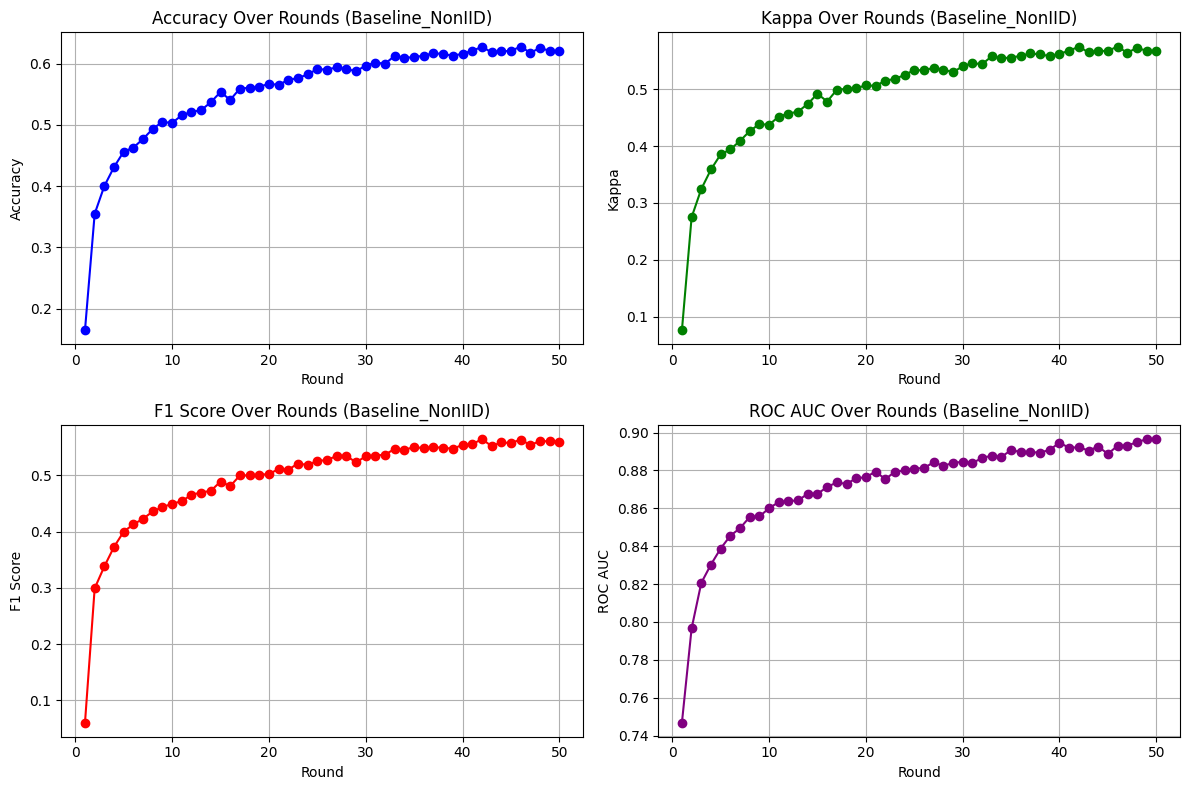

DEBUG 2024-11-24 23:36:33,873:     Asyncio event loop already running.
DEBUG 2024-11-24 23:36:33,874:     Logger propagate set to False
DEBUG 2024-11-24 23:36:33,875:     Pre-registering run with id 16692739164523550797
DEBUG 2024-11-24 23:36:33,875:     Using InMemoryState
DEBUG 2024-11-24 23:36:33,876:     Using InMemoryState
DEBUG 2024-11-24 23:36:33,876:     Buffer time delay: 5s
INFO 2024-11-24 23:36:33,879:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:36:33,880:      
INFO 2024-11-24 23:36:33,880:      [INIT]
INFO 2024-11-24 23:36:33,881:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:36:33,881:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:36:33,881:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:36:33,882:      
INFO 2024-11-24 23:36:33,882:      [ROUND 1]



Running Scenario: One_Attacker_IID


DEBUG 2024-11-24 23:36:38,878:     Using InMemoryState
DEBUG 2024-11-24 23:36:38,879:     Registered 5 nodes
DEBUG 2024-11-24 23:36:38,879:     Supported backends: ['ray']
DEBUG 2024-11-24 23:36:38,880:     Initialising: RayBackend
DEBUG 2024-11-24 23:36:38,881:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
INFO 2024-11-24 23:36:39,881:      configure_fit: strategy sampled 2 clients (out of 5)
2024-11-24 23:36:40,868	INFO worker.py:1819 -- Started a local Ray instance.
DEBUG 2024-11-24 23:36:41,433:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:36:41,434:     Using InMemoryState
(ClientAppActor pid=1554909) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1554909)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 23:36:51,638:      aggreg

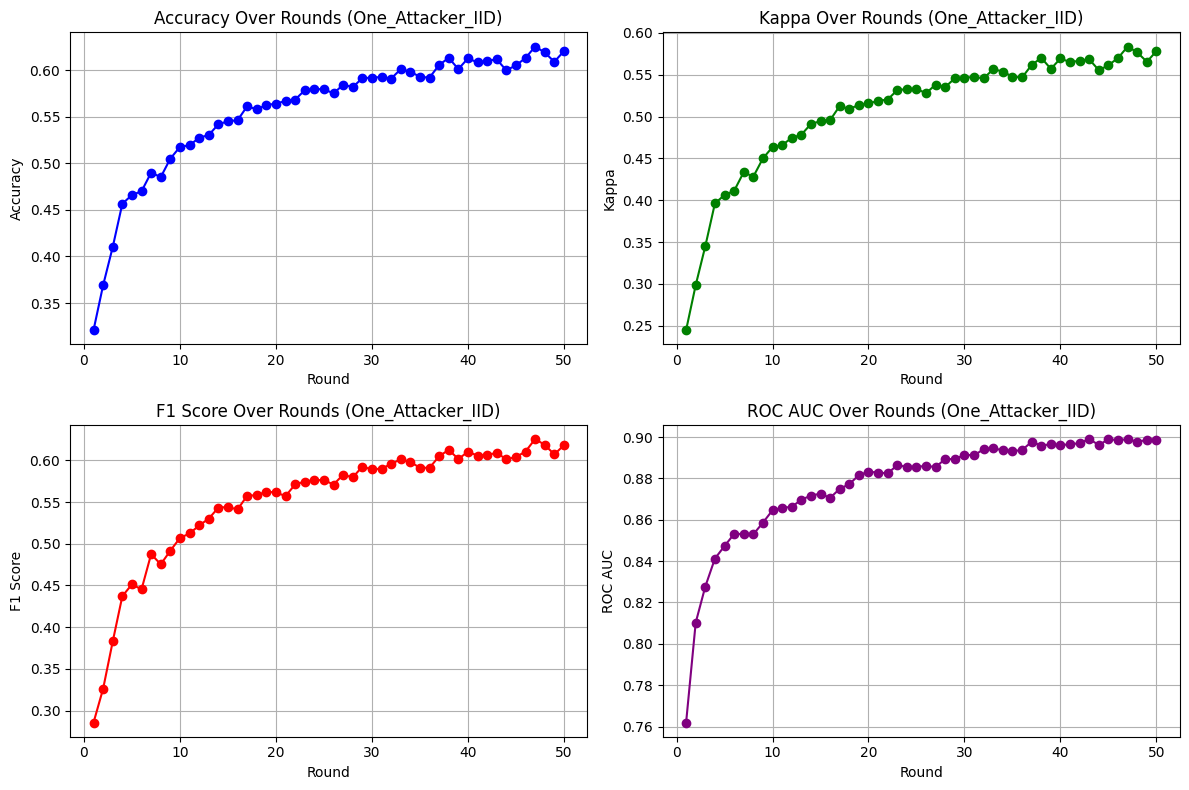

DEBUG 2024-11-24 23:43:11,349:     Asyncio event loop already running.
DEBUG 2024-11-24 23:43:11,350:     Logger propagate set to False
DEBUG 2024-11-24 23:43:11,351:     Pre-registering run with id 3518441115080725122
DEBUG 2024-11-24 23:43:11,352:     Using InMemoryState
DEBUG 2024-11-24 23:43:11,352:     Using InMemoryState
DEBUG 2024-11-24 23:43:11,353:     Buffer time delay: 5s
INFO 2024-11-24 23:43:11,356:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:43:11,357:      
INFO 2024-11-24 23:43:11,357:      [INIT]
INFO 2024-11-24 23:43:11,358:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:43:11,358:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:43:11,358:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:43:11,359:      
INFO 2024-11-24 23:43:11,359:      [ROUND 1]



Running Scenario: One_Attacker_NonIID


DEBUG 2024-11-24 23:43:16,354:     Using InMemoryState
DEBUG 2024-11-24 23:43:16,356:     Registered 5 nodes
DEBUG 2024-11-24 23:43:16,356:     Supported backends: ['ray']
DEBUG 2024-11-24 23:43:16,357:     Initialising: RayBackend
DEBUG 2024-11-24 23:43:16,358:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 23:43:17,320	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 23:43:17,933:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 23:43:17,948:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:43:17,948:     Using InMemoryState
(ClientAppActor pid=1563577) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1563577)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
(ClientAppActor pid=1563577) /home/fredri

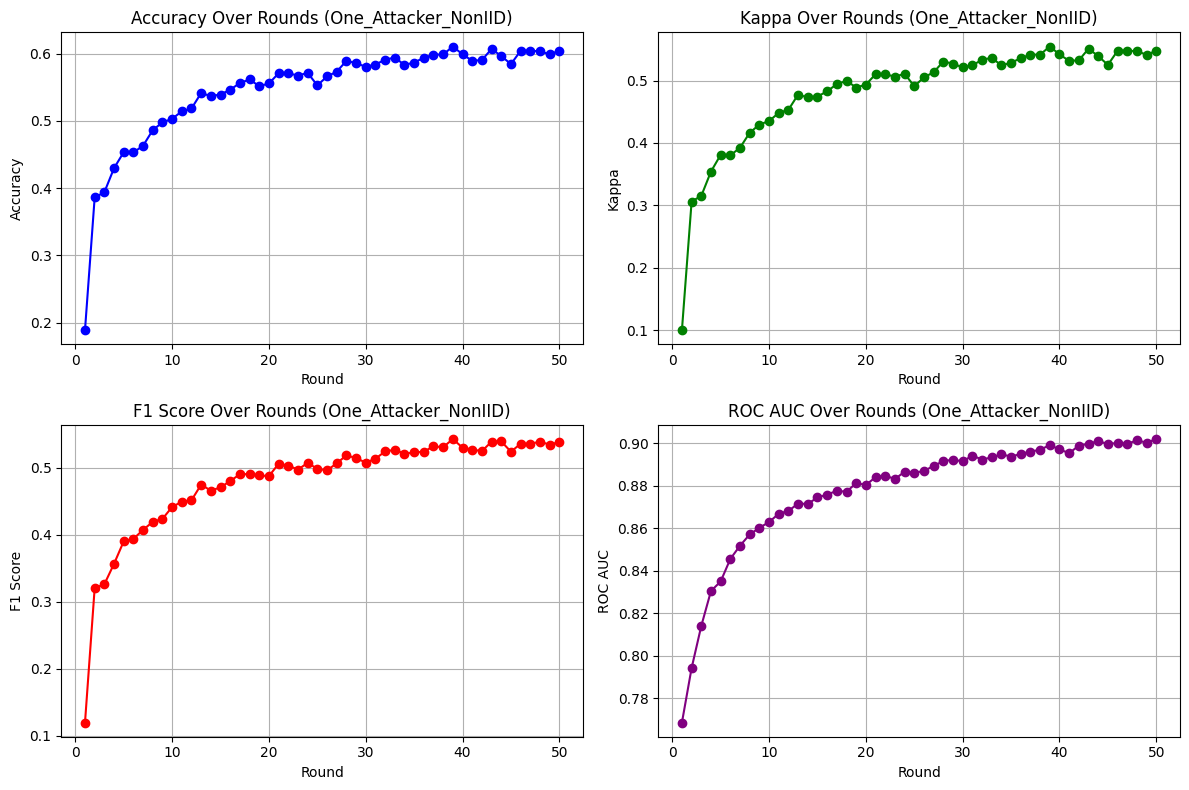

DEBUG 2024-11-24 23:50:13,312:     Asyncio event loop already running.
DEBUG 2024-11-24 23:50:13,312:     Logger propagate set to False
DEBUG 2024-11-24 23:50:13,313:     Pre-registering run with id 1808668180177338444
DEBUG 2024-11-24 23:50:13,313:     Using InMemoryState
DEBUG 2024-11-24 23:50:13,314:     Using InMemoryState
DEBUG 2024-11-24 23:50:13,315:     Buffer time delay: 5s
INFO 2024-11-24 23:50:13,318:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:50:13,318:      
INFO 2024-11-24 23:50:13,319:      [INIT]
INFO 2024-11-24 23:50:13,319:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:50:13,320:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:50:13,320:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:50:13,320:      
INFO 2024-11-24 23:50:13,321:      [ROUND 1]



Running Scenario: Two_Attackers_IID


DEBUG 2024-11-24 23:50:18,316:     Using InMemoryState
DEBUG 2024-11-24 23:50:18,316:     Registered 5 nodes
DEBUG 2024-11-24 23:50:18,317:     Supported backends: ['ray']
DEBUG 2024-11-24 23:50:18,318:     Initialising: RayBackend
DEBUG 2024-11-24 23:50:18,318:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 23:50:19,288	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 23:50:19,829:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 23:50:19,843:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:50:19,844:     Using InMemoryState
(ClientAppActor pid=1572326) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1572326)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 23:50:30,350:      aggreg

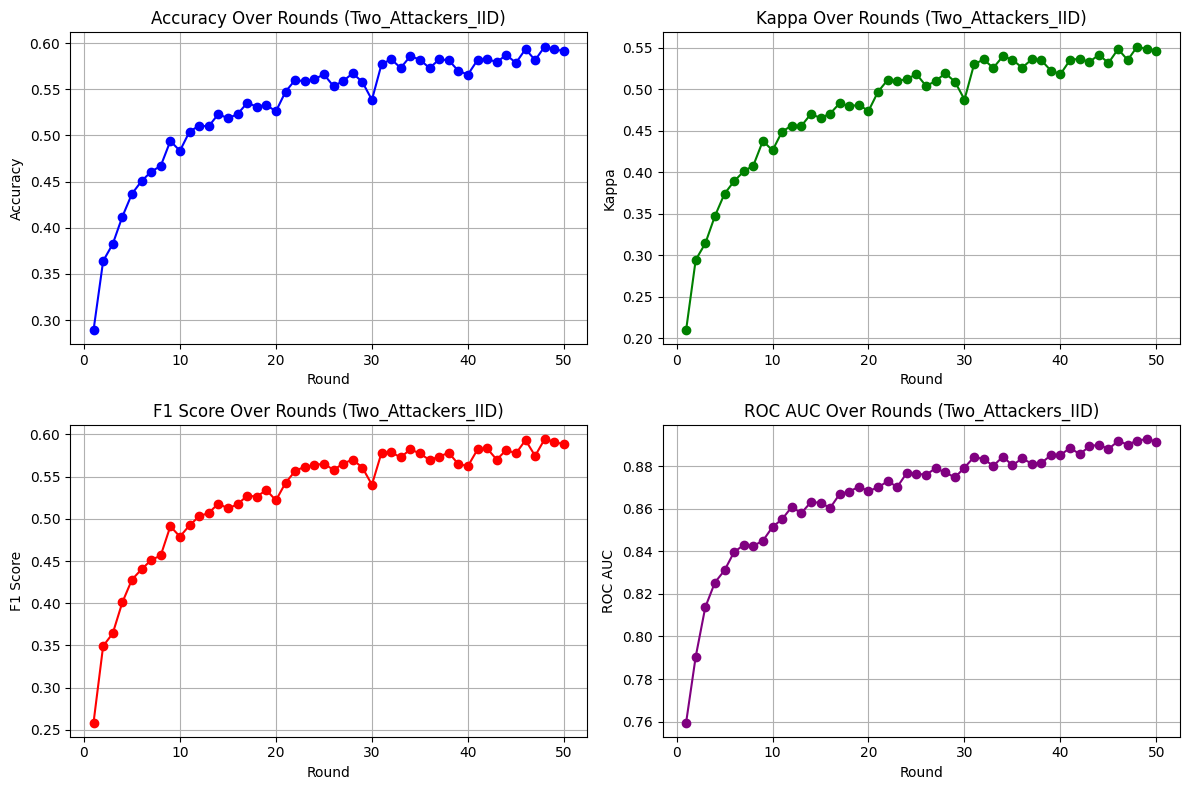

DEBUG 2024-11-24 23:56:50,402:     Asyncio event loop already running.
DEBUG 2024-11-24 23:56:50,403:     Logger propagate set to False
DEBUG 2024-11-24 23:56:50,403:     Pre-registering run with id 15268038366998604176
DEBUG 2024-11-24 23:56:50,404:     Using InMemoryState
DEBUG 2024-11-24 23:56:50,405:     Using InMemoryState
DEBUG 2024-11-24 23:56:50,406:     Buffer time delay: 5s
INFO 2024-11-24 23:56:50,409:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 23:56:50,409:      
INFO 2024-11-24 23:56:50,410:      [INIT]
INFO 2024-11-24 23:56:50,410:      Using initial global parameters provided by strategy
INFO 2024-11-24 23:56:50,411:      Starting evaluation of initial global parameters
INFO 2024-11-24 23:56:50,411:      Evaluation returned no results (`None`)
INFO 2024-11-24 23:56:50,411:      
INFO 2024-11-24 23:56:50,412:      [ROUND 1]



Running Scenario: Two_Attackers_NonIID


DEBUG 2024-11-24 23:56:55,408:     Using InMemoryState
DEBUG 2024-11-24 23:56:55,408:     Registered 5 nodes
DEBUG 2024-11-24 23:56:55,409:     Supported backends: ['ray']
DEBUG 2024-11-24 23:56:55,409:     Initialising: RayBackend
DEBUG 2024-11-24 23:56:55,409:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
INFO 2024-11-24 23:56:56,410:      configure_fit: strategy sampled 2 clients (out of 5)
2024-11-24 23:56:57,397	INFO worker.py:1819 -- Started a local Ray instance.
DEBUG 2024-11-24 23:56:57,882:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 23:56:57,883:     Using InMemoryState
(ClientAppActor pid=1581006) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1581006)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 23:57:09,694:      aggreg

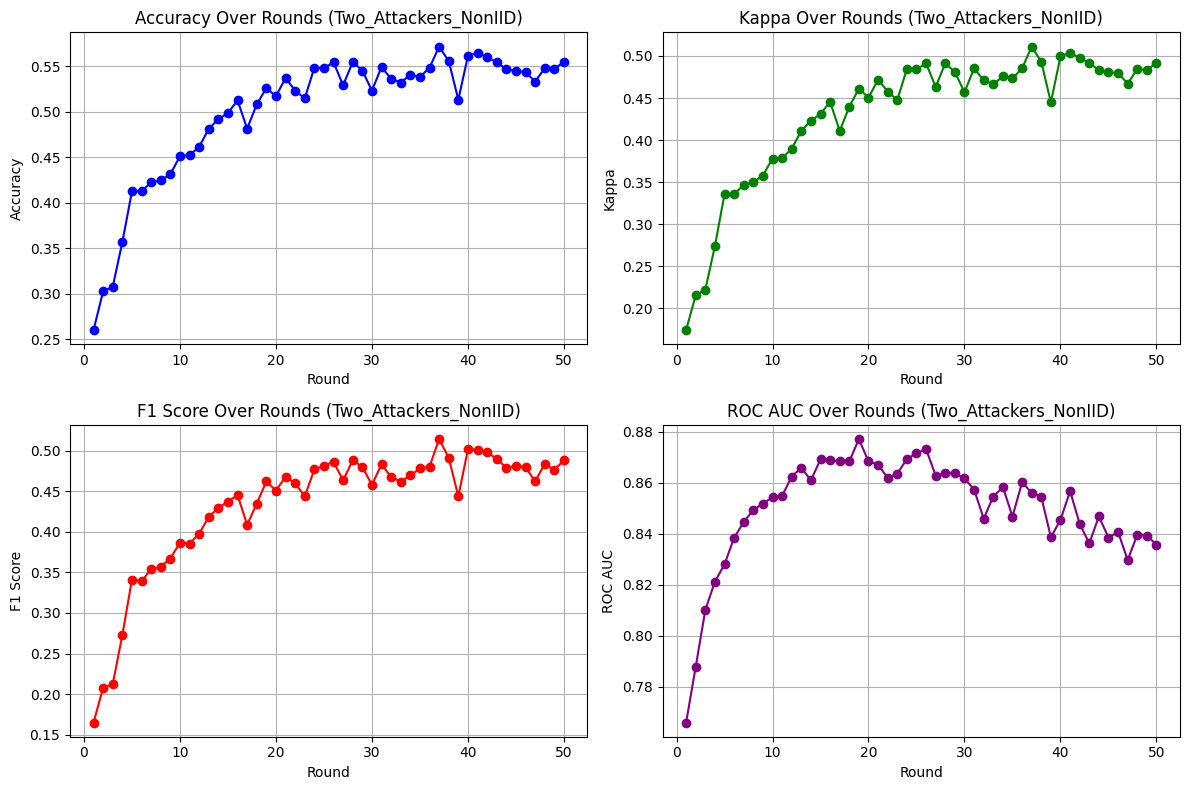

In [ ]:
# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

# Define constants
NUM_CLIENTS = 5
NUM_ROUNDS = 50
BATCH_SIZE = 32

# Function to run simulation for a given scenario
def run_simulation_scenario(ATTACKER_IDS, USE_IID):
    # Initialize metrics lists
    rounds_list = []
    accuracy_list = []
    kappa_list = []
    f1_list = []
    roc_auc_list = []

    # Define partitioner based on IID or non-IID
    if USE_IID:
        # IID Partitioning
        partitioner = IidPartitioner(num_partitions=NUM_CLIENTS)
    else:
        # Non-IID Partitioning using Dirichlet distribution
        alpha = 1.0  # Adjust alpha for desired heterogeneity
        partitioner = DirichletPartitioner(num_partitions=NUM_CLIENTS, alpha=alpha, partition_by="label")

    # Load the CIFAR-10 dataset and partition it
    fds = FederatedDataset(dataset="cifar10", partitioners={"train": partitioner})

    def get_cifar10_dataloaders(cifar10_dataset, batch_size: int):
        """
        Function to handle CIFAR-10 data loaders.
        Applies appropriate transformations for CIFAR-10 images.
        """
        # CIFAR-10 normalization parameters
        pytorch_transforms = Compose([
            ToTensor(),
            Normalize((0.4914, 0.4822, 0.4465),
                      (0.2023, 0.1994, 0.2010)),
        ])

        # Prepare transformation functions
        def apply_transforms(batch):
            """Apply transforms to the partition from FederatedDataset."""
            batch["img"] = [pytorch_transforms(img) for img in batch["img"]]
            return batch

        cifar10_dataset = cifar10_dataset.with_transform(apply_transforms)

        # Construct PyTorch dataloader
        dataloader = DataLoader(cifar10_dataset, batch_size=batch_size, shuffle=True)
        return dataloader

    # Define the neural network model suitable for CIFAR-10
    class Net(nn.Module):
        def __init__(self, num_classes: int) -> None:
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)  # Input channels adjusted for CIFAR-10
            self.pool = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, num_classes)

        def forward(self, x: torch.Tensor) -> torch.Tensor:
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    # Functions to set and get model parameters
    def set_params(model, parameters):
        """Replace model parameters with those passed as parameters."""
        params_dict = zip(model.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.from_numpy(v) for k, v in params_dict})
        model.load_state_dict(state_dict, strict=True)

    def get_params(model):
        """Extract model parameters as a list of NumPy arrays."""
        return [val.cpu().numpy() for _, val in model.state_dict().items()]

    # Training function with label flipping for attackers and proximal term
    def train(net, trainloader, optimizer, device="cpu", is_attacker=False, global_params=None, mu=0.1):
        """Train the network on the training set with optional proximal term."""
        criterion = torch.nn.CrossEntropyLoss()
        net.to(device)
        net.train()
        for batch in trainloader:
            images, labels = batch["img"].to(device), batch["label"].to(device)
            optimizer.zero_grad()
            if is_attacker:
                # Flip labels for attackers (simple label flipping)
                labels = (labels + 1) % 10
            outputs = net(images)
            loss = criterion(outputs, labels)
            if global_params is not None:
                # Add proximal term
                proximal_loss = 0.0
                for param, global_param in zip(net.parameters(), global_params.values()):
                    proximal_loss += torch.norm(param - global_param.to(device))**2
                loss += (mu / 2) * proximal_loss
            loss.backward()
            optimizer.step()

    # Testing function with metric calculations
    def test(net, testloader, device):
        """Validate the network on the entire test set."""
        criterion = torch.nn.CrossEntropyLoss()
        net.to(device)
        net.eval()
        correct, loss = 0, 0.0
        all_preds = []
        all_labels = []
        all_outputs = []
        with torch.no_grad():
            for batch in testloader:
                images, labels = batch["img"].to(device), batch["label"].to(device)
                outputs = net(images)
                loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_outputs.extend(outputs.cpu().numpy())
        accuracy = correct / len(testloader.dataset)

        # Compute metrics
        kappa = cohen_kappa_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='macro')

        # Check if there are at least two classes in y_true
        unique_classes = np.unique(all_labels)
        if len(unique_classes) > 1:
            try:
                all_labels_bin = label_binarize(all_labels, classes=list(range(10)))
                all_outputs_array = np.array(all_outputs)
                roc_auc = roc_auc_score(all_labels_bin, all_outputs_array, average='macro', multi_class='ovr')
            except ValueError:
                roc_auc = float('nan')  # Assign NaN if ROC AUC cannot be computed
        else:
            roc_auc = float('nan')  # Assign NaN if only one class is present

        metrics = {
            "accuracy": accuracy,
            "kappa": kappa,
            "f1_score": f1,
            "roc_auc": roc_auc,
        }
        return loss, accuracy, metrics

    # Define the FlowerClient class
    class FlowerClient(NumPyClient):
        def __init__(self, trainloader, valloader, is_attacker=False) -> None:
            super().__init__()
            self.trainloader = trainloader
            self.valloader = valloader
            self.model = Net(num_classes=10)
            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            self.is_attacker = is_attacker

        def fit(self, parameters, config):
            """Train the model locally with FedProx proximal term."""
            # Set model parameters
            set_params(self.model, parameters)

            # Extract global parameters from config
            global_params = OrderedDict(
                (k, torch.tensor(v)) for k, v in zip(self.model.state_dict().keys(), parameters)
            )

            # Get proximal_mu from config
            mu = config.get("proximal_mu", 0.1)  # Default to 0.1 if not set

            # Define the optimizer
            optim = torch.optim.SGD(self.model.parameters(), lr=0.01, momentum=0.9)

            # Train the model with proximal term
            train(
                self.model,
                self.trainloader,
                optim,
                self.device,
                is_attacker=self.is_attacker,
                global_params=global_params,
                mu=mu  # Proximal term coefficient
            )

            # Return updated parameters (full model parameters)
            return get_params(self.model), len(self.trainloader.dataset), {}

        def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]):
            """Evaluate the model locally."""
            set_params(self.model, parameters)
            loss, accuracy, metrics = test(self.model, self.valloader, self.device)
            return float(loss), len(self.valloader.dataset), metrics

    # Define the client function
    def client_fn(context: Context):
        """Create a Flower client representing a participant in the federated learning."""
        partition_id = int(context.node_config["partition-id"])
        partition = fds.load_partition(partition_id, "train")
        # Partition into train/validation
        partition_train_val = partition.train_test_split(test_size=0.1, seed=42)
        # Get dataloaders
        trainloader = get_cifar10_dataloaders(partition_train_val["train"], batch_size=BATCH_SIZE)
        valloader = get_cifar10_dataloaders(partition_train_val["test"], batch_size=BATCH_SIZE)
        # Determine if the client is an attacker
        is_attacker = partition_id in ATTACKER_IDS
        return FlowerClient(trainloader=trainloader, valloader=valloader, is_attacker=is_attacker).to_client()

    # Define function to provide fit config with proximal_mu
    def fit_config(rnd: int):
        """Return training configuration dict for each round."""
        return {"proximal_mu": 0.1}  # Set proximal_mu value

    # Define custom strategy to log metrics
    class CustomFedProx(FedProx):
        def __init__(self, *args, **kwargs):
            self.rounds_list = kwargs.pop('rounds_list')
            self.accuracy_list = kwargs.pop('accuracy_list')
            self.kappa_list = kwargs.pop('kappa_list')
            self.f1_list = kwargs.pop('f1_list')
            self.roc_auc_list = kwargs.pop('roc_auc_list')
            proximal_mu = kwargs.pop('proximal_mu', 0.1)  # Extract proximal_mu
            super().__init__(*args, proximal_mu=proximal_mu, **kwargs)  # Pass proximal_mu to FedProx

        def aggregate_evaluate(
            self,
            rnd: int,
            results: List[Tuple[ClientProxy, EvaluateRes]],
            failures: List[BaseException],
        ):
            """Aggregate evaluation results using weighted average and log metrics per round."""
            if not results:
                return None, {}

            # Use weighted average to aggregate metrics
            num_examples_total = sum([r[1].num_examples for r in results])

            # Initialize sums
            accuracy_sum = 0.0
            kappa_sum = 0.0
            f1_sum = 0.0
            roc_auc_sum = 0.0
            roc_auc_weight = 0

            for _, evaluate_res in results:
                accuracy_sum += evaluate_res.metrics.get("accuracy", 0.0) * evaluate_res.num_examples
                kappa_sum += evaluate_res.metrics.get("kappa", 0.0) * evaluate_res.num_examples
                f1_sum += evaluate_res.metrics.get("f1_score", 0.0) * evaluate_res.num_examples
                roc_auc = evaluate_res.metrics.get("roc_auc", float('nan'))
                if not np.isnan(roc_auc):
                    roc_auc_sum += roc_auc * evaluate_res.num_examples
                    roc_auc_weight += evaluate_res.num_examples

            # Compute weighted averages
            accuracy = accuracy_sum / num_examples_total
            kappa = kappa_sum / num_examples_total
            f1 = f1_sum / num_examples_total
            roc_auc = roc_auc_sum / roc_auc_weight if roc_auc_weight > 0 else float('nan')

            # Log metrics
            log(INFO, f"Round {rnd} evaluation metrics:")
            log(INFO, f"Accuracy: {accuracy:.4f}")
            log(INFO, f"Kappa: {kappa:.4f}")
            log(INFO, f"F1 Score: {f1:.4f}")
            if not np.isnan(roc_auc):
                log(INFO, f"ROC AUC: {roc_auc:.4f}")
            else:
                log(INFO, f"ROC AUC: Undefined (only one class present in y_true)")

            # Store metrics
            self.rounds_list.append(rnd)
            self.accuracy_list.append(accuracy)
            self.kappa_list.append(kappa)
            self.f1_list.append(f1)
            self.roc_auc_list.append(roc_auc if not np.isnan(roc_auc) else 0.0)

            # Return aggregated loss and metrics
            return super().aggregate_evaluate(rnd, results, failures)

    # Define the custom Median FedProx strategy
    class MedianFedProx(CustomFedProx):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)

        def aggregate_fit(
            self,
            rnd: int,
            results: List[Tuple[ClientProxy, EvaluateRes]],
            failures: List[BaseException],
        ):
            if not results:
                return None, {}

            # Extract parameters from results
            weights = [parameters_to_ndarrays(fit_res.parameters) for _, fit_res in results]
            num_clients = len(weights)

            # Stack the weights for each parameter
            num_params = len(weights[0])
            aggregated_weights = []

            for param_idx in range(num_params):
                # Collect the parameter across clients
                param_list = [weights[client_idx][param_idx] for client_idx in range(num_clients)]
                param_array = np.array(param_list)

                # Compute coordinate-wise median for this parameter
                aggregated_param = np.median(param_array, axis=0)
                aggregated_weights.append(aggregated_param)

            # Convert the aggregated weights back to Parameters
            aggregated_parameters = ndarrays_to_parameters(aggregated_weights)

            # Return the aggregated parameters and empty metrics dict
            return aggregated_parameters, {}

    # Define the server function
    def server_fn(context: Context):
        # Instantiate the model
        model = Net(num_classes=10)
        ndarrays = get_params(model)
        # Convert model parameters to flwr.common.Parameters
        global_model_init = ndarrays_to_parameters(ndarrays)

        # Create the custom Median FedProx strategy
        strategy = MedianFedProx(
            fraction_fit=1.0,        # All clients participate in training
            fraction_evaluate=1.0,   # All clients participate in evaluation
            initial_parameters=global_model_init,  # Initialized global model
            rounds_list=rounds_list,
            accuracy_list=accuracy_list,
            kappa_list=kappa_list,
            f1_list=f1_list,
            roc_auc_list=roc_auc_list,
            proximal_mu=0.1,  # Proximal term coefficient for FedProx
            on_fit_config_fn=fit_config,  # Function to provide fit config
        )

        # Construct ServerConfig
        config = ServerConfig(num_rounds=NUM_ROUNDS)

        # Wrap everything into a ServerAppComponents object
        return ServerAppComponents(strategy=strategy, config=config)

    # Create your ServerApp and ClientApp
    server_app = ServerApp(server_fn=server_fn)
    from flwr.client import ClientApp
    client_app = ClientApp(
        client_fn=client_fn,
    )

    # Run the simulation
    run_simulation(
        server_app=server_app,
        client_app=client_app,
        num_supernodes=NUM_CLIENTS,
        backend_name="ray",
        verbose_logging=True,
    )

    # After the simulation, collect the metrics
    metrics = {
        "rounds": rounds_list,
        "accuracy": accuracy_list,
        "kappa": kappa_list,
        "f1_score": f1_list,
        "roc_auc": roc_auc_list,
    }

    return metrics

# Function to run all scenarios
def run_all_scenarios():
    scenarios = [
        # Scenarios without Attackers (Baseline)
        {"name": "Baseline_IID", "ATTACKER_IDS": [], "USE_IID": True},
        {"name": "Baseline_NonIID", "ATTACKER_IDS": [], "USE_IID": False},
        
        # Scenarios with One Attacker
        {"name": "One_Attacker_IID", "ATTACKER_IDS": [0], "USE_IID": True},
        {"name": "One_Attacker_NonIID", "ATTACKER_IDS": [0], "USE_IID": False},
        
        # Scenarios with Two Attackers
        {"name": "Two_Attackers_IID", "ATTACKER_IDS": [0, 1], "USE_IID": True},
        {"name": "Two_Attackers_NonIID", "ATTACKER_IDS": [0, 1], "USE_IID": False},
    ]

    results = {}

    for scenario in scenarios:
        print(f"\nRunning Scenario: {scenario['name']}")
        ATTACKER_IDS = scenario["ATTACKER_IDS"]
        USE_IID = scenario["USE_IID"]
        metrics = run_simulation_scenario(ATTACKER_IDS, USE_IID)
        results[scenario['name']] = metrics

        # Plot the metrics
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        plt.plot(metrics["rounds"], metrics["accuracy"], marker='o', color='blue')
        plt.title(f"Accuracy Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel('Accuracy')
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(metrics["rounds"], metrics["kappa"], marker='o', color='green')
        plt.title(f"Kappa Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel('Kappa')
        plt.grid(True)

        plt.subplot(2, 2, 3)
        plt.plot(metrics["rounds"], metrics["f1_score"], marker='o', color='red')
        plt.title(f"F1 Score Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel("F1 Score")
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(metrics["rounds"], metrics["roc_auc"], marker='o', color='purple')
        plt.title(f"ROC AUC Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel("ROC AUC")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Save metrics to CSV
        df = pd.DataFrame(metrics)
        df.to_csv(f"FedProx_Median_Aggregation_Defense_{scenario['name']}_metrics.csv", index=False)

    return results

# Run all scenarios
results = run_all_scenarios()


In [12]:
# Define the list of scenarios
scenarios = [
    "Baseline_IID",
    "One_Attacker_IID",
    "Two_Attackers_IID",
    "Baseline_NonIID",
    "One_Attacker_NonIID",
    "Two_Attackers_NonIID",
]

# Initialize a dictionary to store DataFrames
dataframes = {}

# Load each CSV file into a DataFrame
for scenario in scenarios:
    filename = f"FedProx_Median_Aggregation_Defense_{scenario}_metrics.csv"
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        dataframes[scenario] = df
        print(f"Loaded {filename} successfully.")
    else:
        print(f"Warning: {filename} does not exist and will be skipped.")

# Verify the loaded data
for scenario, df in dataframes.items():
    print(f"\nFirst few rows for FedProx Median Aggregation Defense {scenario}:")
    display(df.head())


Loaded FedProx_Median_Aggregation_Defense_Baseline_IID_metrics.csv successfully.
Loaded FedProx_Median_Aggregation_Defense_One_Attacker_IID_metrics.csv successfully.
Loaded FedProx_Median_Aggregation_Defense_Two_Attackers_IID_metrics.csv successfully.
Loaded FedProx_Median_Aggregation_Defense_Baseline_NonIID_metrics.csv successfully.
Loaded FedProx_Median_Aggregation_Defense_One_Attacker_NonIID_metrics.csv successfully.
Loaded FedProx_Median_Aggregation_Defense_Two_Attackers_NonIID_metrics.csv successfully.

First few rows for FedProx Median Aggregation Defense Baseline_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.3090,0.229591,0.269694,0.771475
1,2,0.4032,0.336066,0.390088,0.811059
2,3,0.4268,0.362799,0.420735,0.829342
3,4,0.4456,0.383352,0.428372,0.837942
4,5,0.4582,0.397990,0.440092,0.846006



First few rows for FedProx Median Aggregation Defense One_Attacker_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.3210,0.244775,0.285585,0.761945
1,2,0.3692,0.298482,0.326258,0.810269
2,3,0.4102,0.344969,0.382876,0.827718
3,4,0.4566,0.396129,0.437220,0.841213
4,5,0.4660,0.406175,0.451314,0.847304



First few rows for FedProx Median Aggregation Defense Two_Attackers_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.2892,0.209595,0.258773,0.759612
1,2,0.3640,0.294229,0.349339,0.790510
2,3,0.3824,0.314073,0.364325,0.813767
3,4,0.4120,0.347018,0.401057,0.825335
4,5,0.4368,0.373907,0.427935,0.831029



First few rows for FedProx Median Aggregation Defense Baseline_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.164901,0.076668,0.060321,0.746879
1,2,0.354787,0.274908,0.299196,0.796589
2,3,0.400160,0.324419,0.338211,0.820621
3,4,0.431141,0.358781,0.372944,0.830305
4,5,0.456326,0.385270,0.399995,0.838754



First few rows for FedProx Median Aggregation Defense One_Attacker_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.188887,0.100131,0.119990,0.768498
1,2,0.385968,0.306144,0.320665,0.794181
2,3,0.393764,0.315160,0.326302,0.814021
3,4,0.429542,0.354152,0.356879,0.830472
4,5,0.453328,0.380947,0.390374,0.834968



First few rows for FedProx Median Aggregation Defense Two_Attackers_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.260244,0.174329,0.165019,0.766061
1,2,0.302818,0.215733,0.208058,0.787890
2,3,0.307815,0.222296,0.212304,0.810075
3,4,0.356786,0.274151,0.272748,0.821216
4,5,0.412353,0.335535,0.341073,0.827987


In [13]:
# Combine all DataFrames into a single DataFrame for easier comparison
combined_df = pd.DataFrame()

for scenario, df in dataframes.items():
    temp_df = df.copy()
    temp_df['Scenario'] = scenario
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

output_file = "FedProx_Median_Aggregation_Defense_combined_metrics.csv"
combined_df.to_csv(output_file, index=False)

# Display the combined DataFrame
print("Combined DataFrame:")
display(combined_df.head())


Combined DataFrame:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3090,0.229591,0.269694,0.771475,Baseline_IID
1,2,0.4032,0.336066,0.390088,0.811059,Baseline_IID
2,3,0.4268,0.362799,0.420735,0.829342,Baseline_IID
3,4,0.4456,0.383352,0.428372,0.837942,Baseline_IID
4,5,0.4582,0.397990,0.440092,0.846006,Baseline_IID


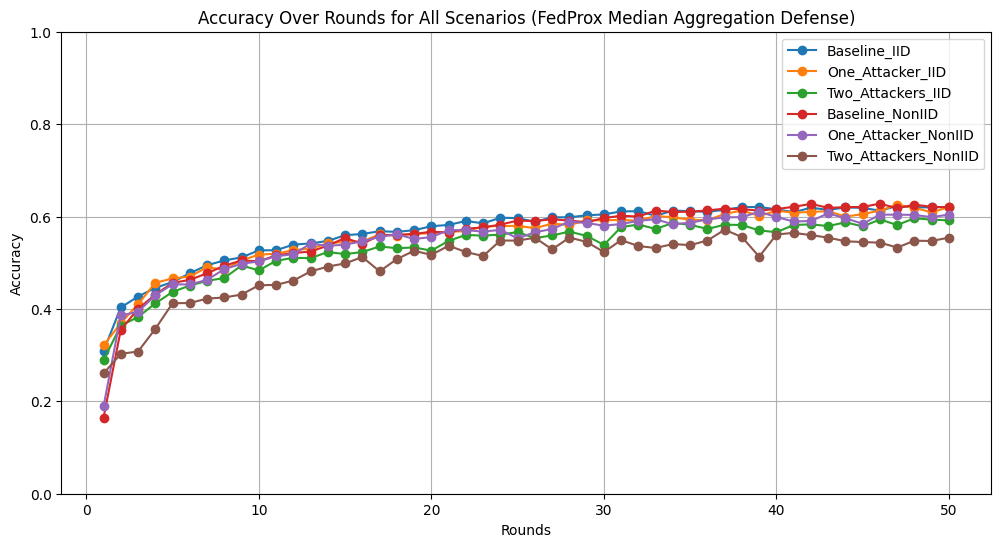

In [14]:
# Plot Accuracy Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['accuracy'], marker='o', label=scenario)

plt.title('Accuracy Over Rounds for All Scenarios (FedProx Median Aggregation Defense)')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


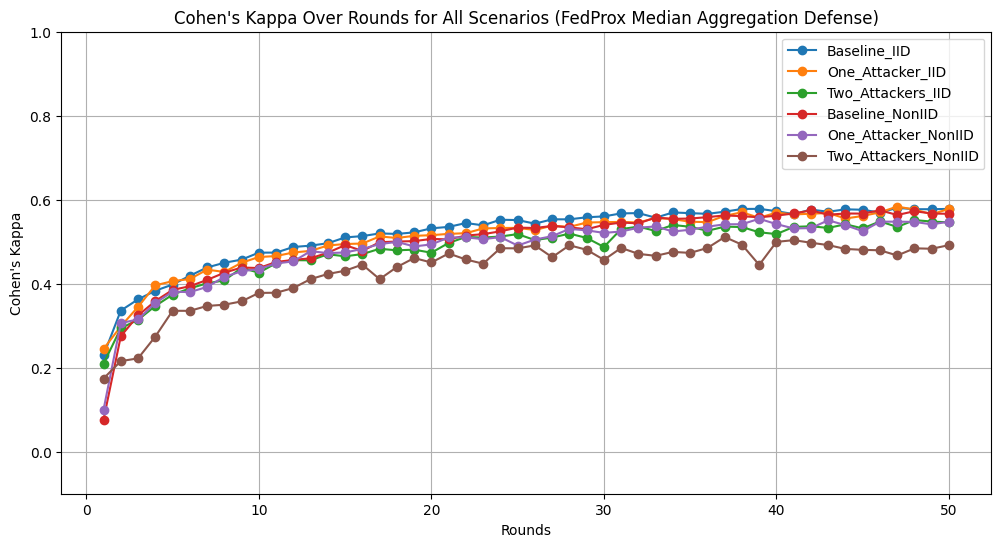

In [15]:
# Plot Cohen's Kappa Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['kappa'], marker='o', label=scenario)

plt.title("Cohen's Kappa Over Rounds for All Scenarios (FedProx Median Aggregation Defense)")
plt.xlabel('Rounds')
plt.ylabel('Cohen\'s Kappa')
plt.ylim(-0.1, 1)
plt.grid(True)
plt.legend()
plt.show()


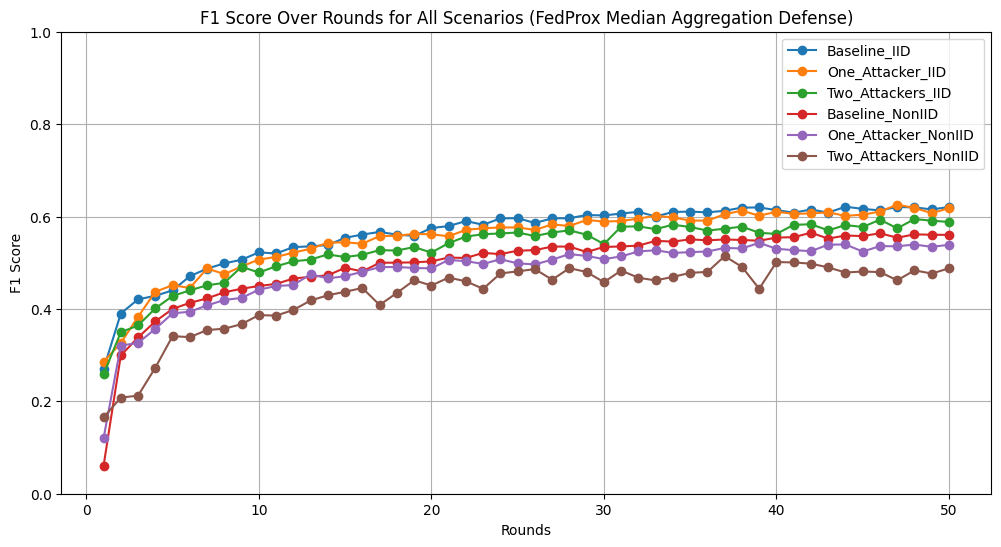

In [16]:
# Plot F1 Score Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['f1_score'], marker='o', label=scenario)

plt.title('F1 Score Over Rounds for All Scenarios (FedProx Median Aggregation Defense)')
plt.xlabel('Rounds')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


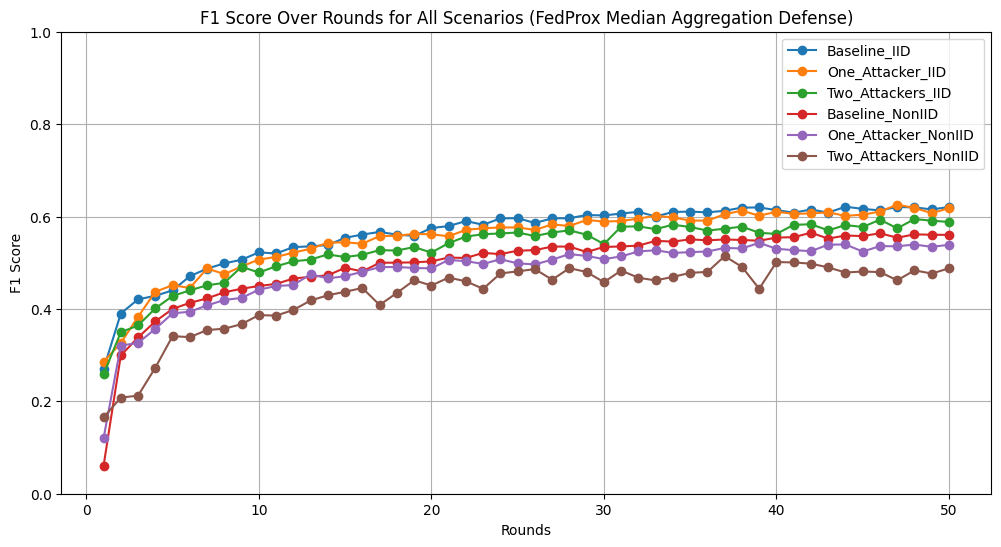

In [17]:
# Plot F1 Score Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['f1_score'], marker='o', label=scenario)

plt.title('F1 Score Over Rounds for All Scenarios (FedProx Median Aggregation Defense)')
plt.xlabel('Rounds')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


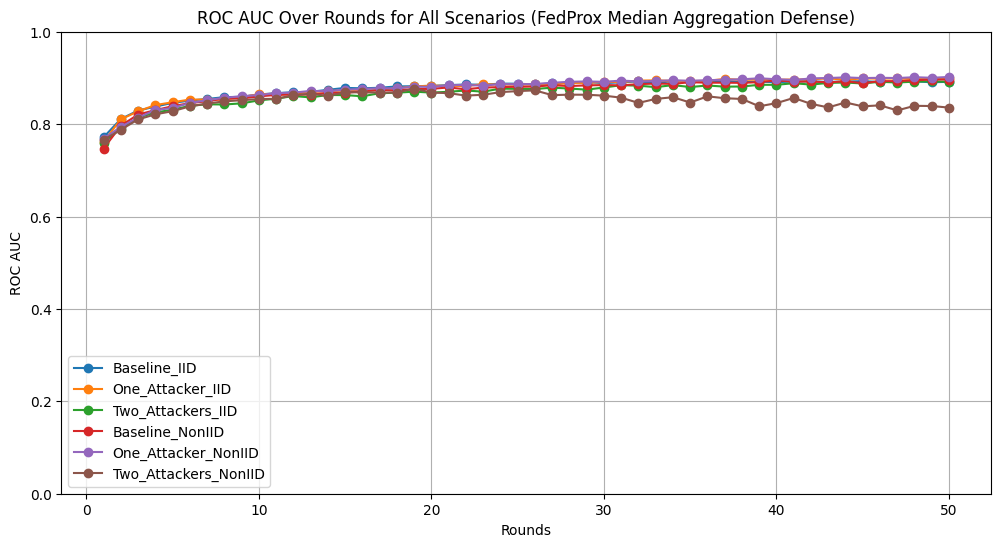

In [18]:
# Plot ROC AUC Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['roc_auc'], marker='o', label=scenario)

plt.title('ROC AUC Over Rounds for All Scenarios (FedProx Median Aggregation Defense)')
plt.xlabel('Rounds')
plt.ylabel('ROC AUC')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


In [19]:
# Create a summary table of final metrics for all scenarios
summary_metrics = []

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        final_round = df['rounds'].max()
        final_metrics = df[df['rounds'] == final_round].iloc[0]
        summary_metrics.append({
            'Scenario': scenario,
            'Final Round': final_round,
            'Accuracy': final_metrics['accuracy'],
            'Kappa': final_metrics['kappa'],
            'F1 Score': final_metrics['f1_score'],
            'ROC AUC': final_metrics['roc_auc']
        })

# Create a DataFrame for the summary
summary_df = pd.DataFrame(summary_metrics)

# Display the summary table
print("Summary of Final Metrics for All Scenarios (FedProx Median Aggregation Defense):")
display(summary_df)


Summary of Final Metrics for All Scenarios (FedProx Median Aggregation Defense):


,Scenario,Final Round,Accuracy,Kappa,F1 Score,ROC AUC
0,Baseline_IID,50,0.620600,0.578166,0.620593,0.891536
1,One_Attacker_IID,50,0.620400,0.578177,0.618204,0.898797
2,Two_Attackers_IID,50,0.591600,0.546083,0.588071,0.891438
3,Baseline_NonIID,50,0.620228,0.566426,0.560296,0.896570
4,One_Attacker_NonIID,50,0.604237,0.547802,0.538769,0.902087
5,Two_Attackers_NonIID,50,0.554467,0.491902,0.487922,0.835720


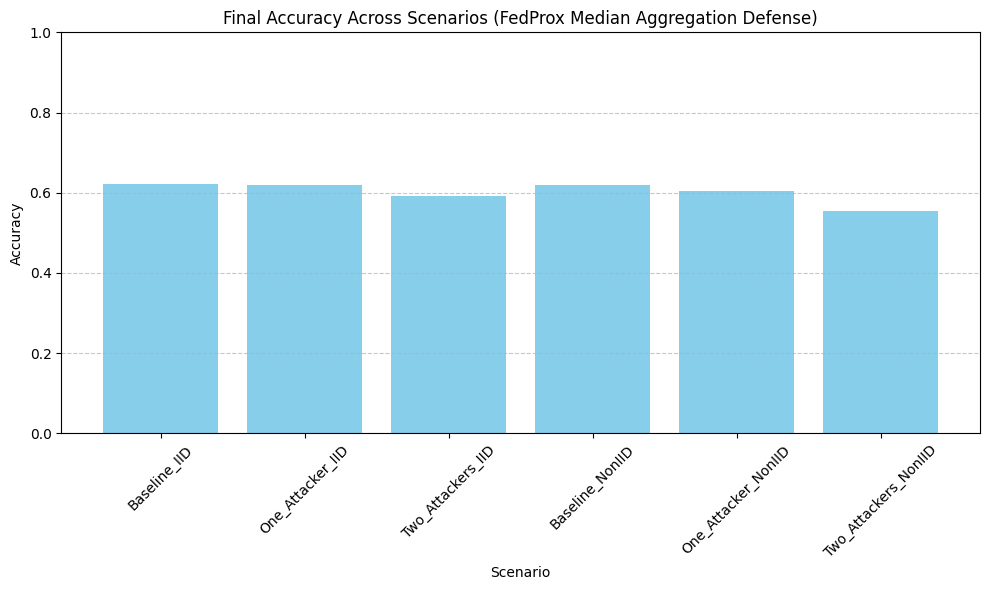

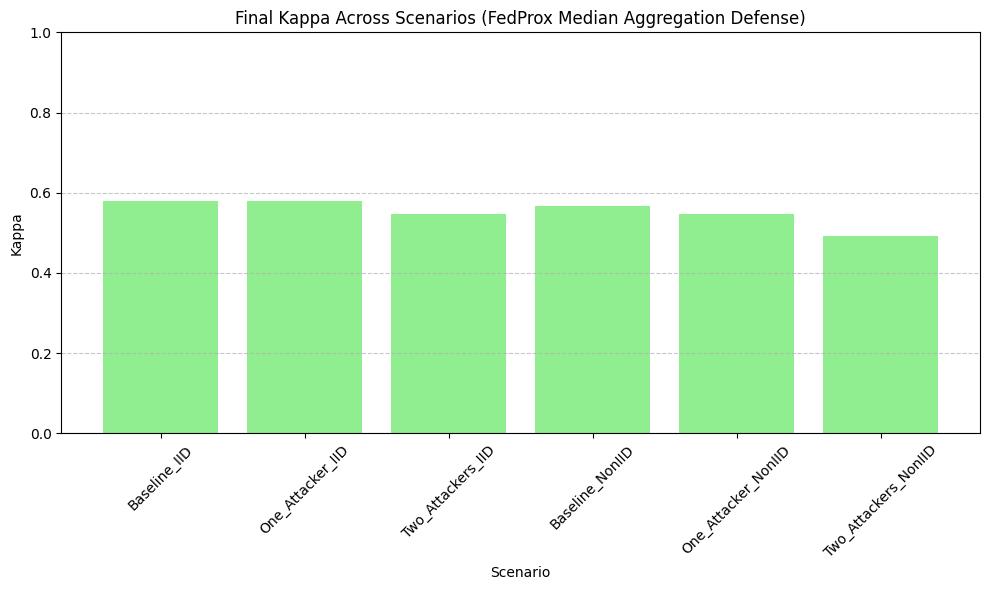

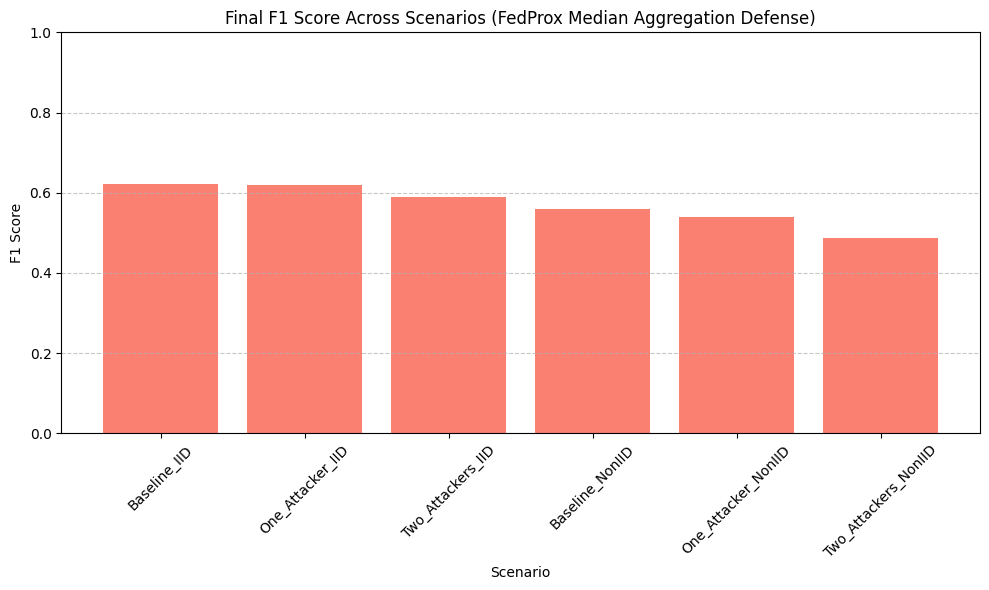

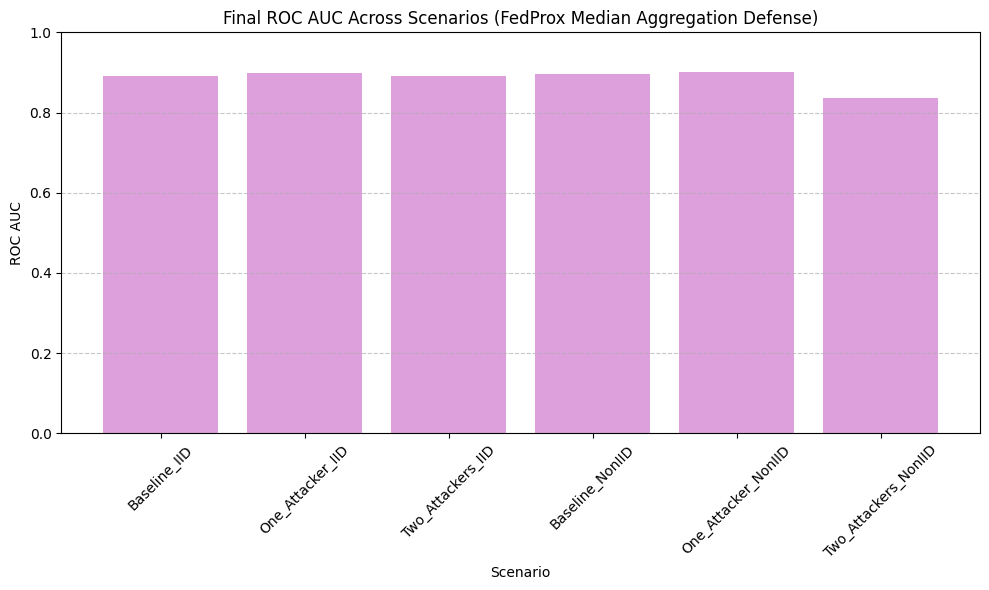

In [20]:
# Plot bar charts to compare final metrics across scenarios

metrics = ['Accuracy', 'Kappa', 'F1 Score', 'ROC AUC']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 6))
    plt.bar(summary_df['Scenario'], summary_df[metric], color=color)
    plt.title(f'Final {metric} Across Scenarios (FedProx Median Aggregation Defense)')
    plt.xlabel('Scenario')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Comparison Between FedProx with geometric median defense and FedProx with median aggregation defense

In [14]:
# Load FedProx Geometric Median Defense Data
fedprox_median_aggregation_defense_path = 'FedProx_Median_Aggregation_Defense_combined_metrics.csv'
fedprox_median_aggregation_defense_data = pd.read_csv(fedprox_median_aggregation_defense_path)

fedprox_geometric_median_defense_path = 'FedProx_Geometric_Median_Defense_combined_metrics.csv'
fedprox_geometric_median_defense_data = pd.read_csv(fedprox_geometric_median_defense_path)

# Display the first few rows to confirm loading
print("FedProx Geometric Median Defense Data Preview:")
display(fedprox_geometric_median_defense_data.head())

print("\nFedProx Median Aggregation Defense Data Preview:")
display(fedprox_median_aggregation_defense_data.head())

FedProx Geometric Median Defense Data Preview:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3102,0.235488,0.290791,0.780331,Baseline_IID
1,2,0.4100,0.344070,0.392321,0.817039,Baseline_IID
2,3,0.4344,0.371381,0.427692,0.828247,Baseline_IID
3,4,0.4478,0.386558,0.434273,0.837438,Baseline_IID
4,5,0.4744,0.415536,0.467597,0.843977,Baseline_IID



FedProx Median Aggregation Defense Data Preview:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3090,0.229591,0.269694,0.771475,Baseline_IID
1,2,0.4032,0.336066,0.390088,0.811059,Baseline_IID
2,3,0.4268,0.362799,0.420735,0.829342,Baseline_IID
3,4,0.4456,0.383352,0.428372,0.837942,Baseline_IID
4,5,0.4582,0.397990,0.440092,0.846006,Baseline_IID


In [15]:
# Define unique scenarios and metrics
scenarios = fedprox_median_aggregation_defense_data['Scenario'].unique()
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']


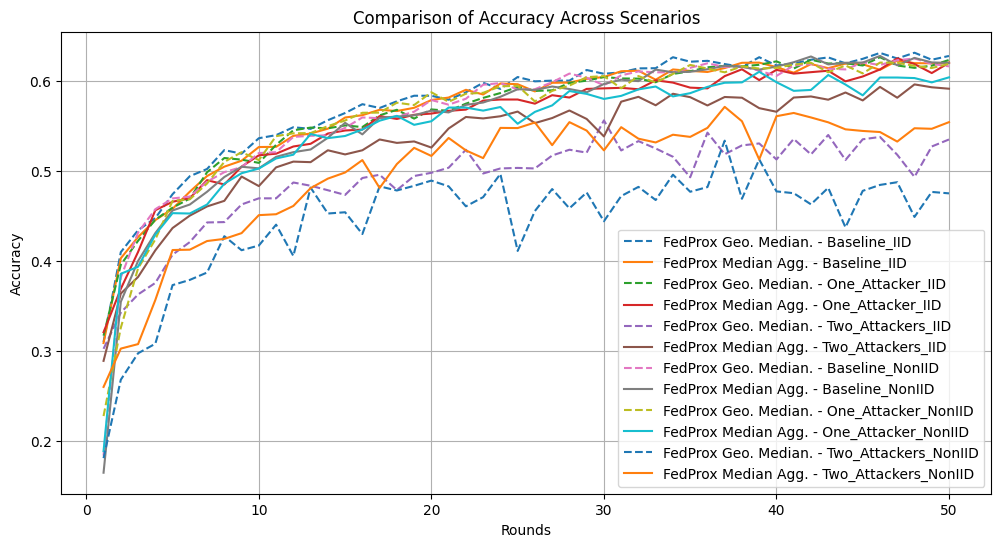

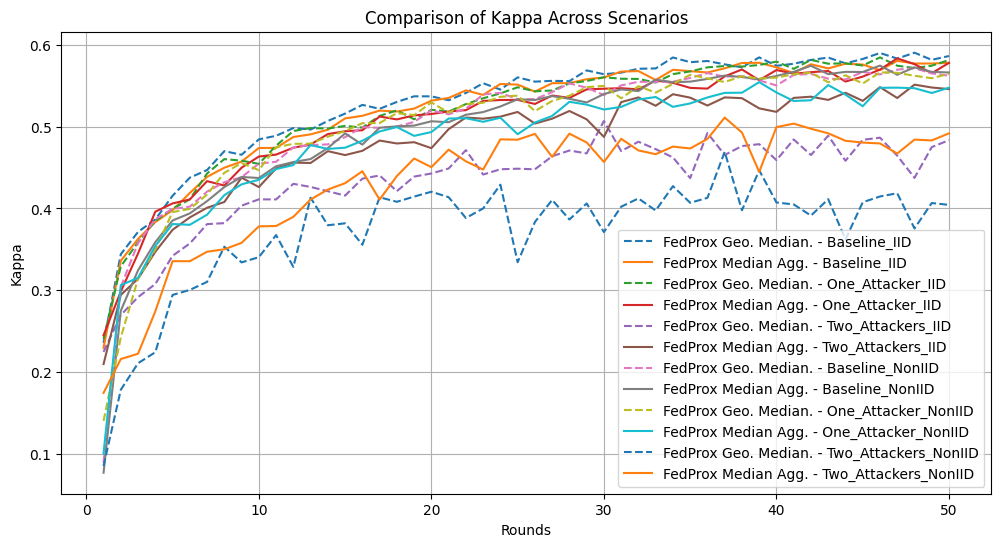

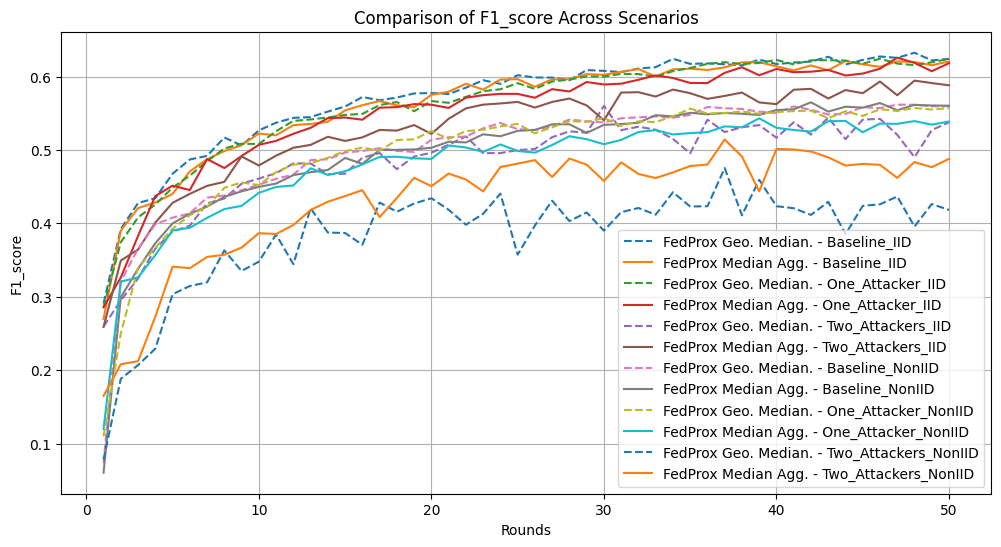

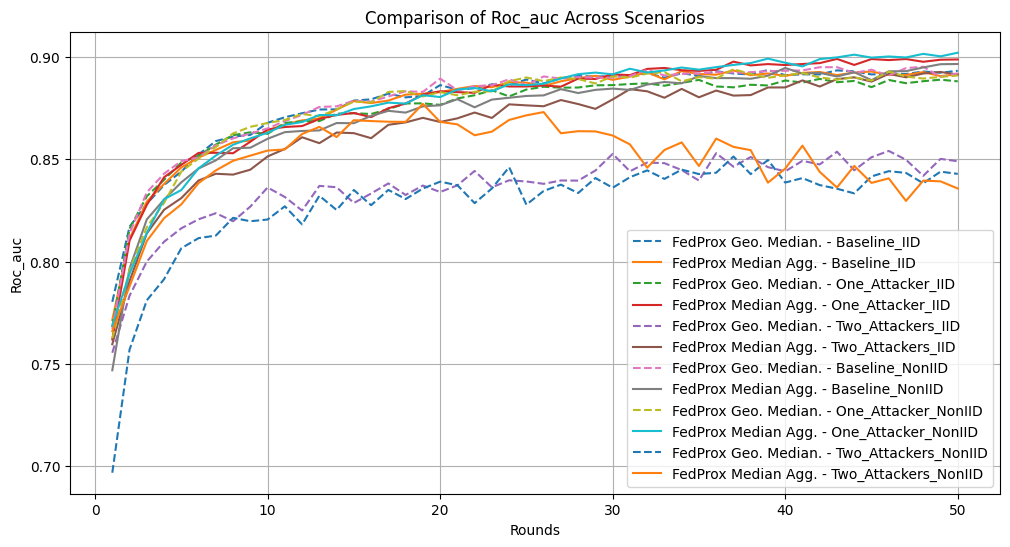

In [16]:
# Plot comparison for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for scenario in scenarios:
        # Filter data for each scenario
        fedprox_geometric_median_defense_scenario = fedprox_geometric_median_defense_data[fedprox_geometric_median_defense_data['Scenario'] == scenario]
        fedprox_median_aggregation_defense_scenario = fedprox_median_aggregation_defense_data[fedprox_median_aggregation_defense_data['Scenario'] == scenario]
        
        plt.plot(fedprox_geometric_median_defense_scenario['rounds'], fedprox_geometric_median_defense_scenario[metric], label=f'FedProx Geo. Median. - {scenario}', linestyle='--')
        plt.plot(fedprox_median_aggregation_defense_scenario['rounds'], fedprox_median_aggregation_defense_scenario[metric], label=f'FedProx Median Agg. - {scenario}')
    
    plt.title(f'Comparison of {metric.capitalize()} Across Scenarios')
    plt.xlabel('Rounds')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
# Group data by scenario and compute the mean for each metric
fedavg_summary = fedprox_geometric_median_defense_data.groupby('Scenario').mean()[metrics]
fedprox_summary = fedprox_median_aggregation_defense_data.groupby('Scenario').mean()[metrics]

# Combine summaries for comparison
comparison_summary = pd.concat([fedavg_summary, fedprox_summary], keys=['FedProx Geo. Median', 'FedProx Median Agg.'], axis=1)

# Display the comparison summary
print("FedProx Geo. Median  vs. FedProx Median Agg.:")
display(comparison_summary)


FedProx Geo. Median  vs. FedProx Median Agg.:


FedProx Geo. Median                                \
                                accuracy     kappa  f1_score   roc_auc   
Scenario                                                                 
Baseline_IID                    0.574500  0.527005  0.569967  0.878149   
Baseline_NonIID                 0.563262  0.503385  0.500671  0.878480   
One_Attacker_IID                0.565336  0.516964  0.561755  0.874265   
One_Attacker_NonIID             0.562027  0.501667  0.498513  0.876119   
Two_Attackers_IID               0.490356  0.433898  0.485674  0.835875   
Two_Attackers_NonIID            0.445457  0.372284  0.384588  0.828473   

                     FedProx Median Agg.                                
                                accuracy     kappa  f1_score   roc_auc  
Scenario                                                                
Baseline_IID                    0.567404  0.519027  0.562727  0.877042  
Baseline_NonIID                 0.557406  0.497207  0.495388  0.872548  
One_Attacker_IID                0.557336  0.508069  0.551986  0.877924  
One_Attacker_NonIID             0.546400  0.483887  0.480345  0.877892  
Two_Attackers_IID               0.533328  0.481511  0.528697  0.867097  
Two_Attackers_NonIID            0.500540  0.432606  0.432100  0.849946

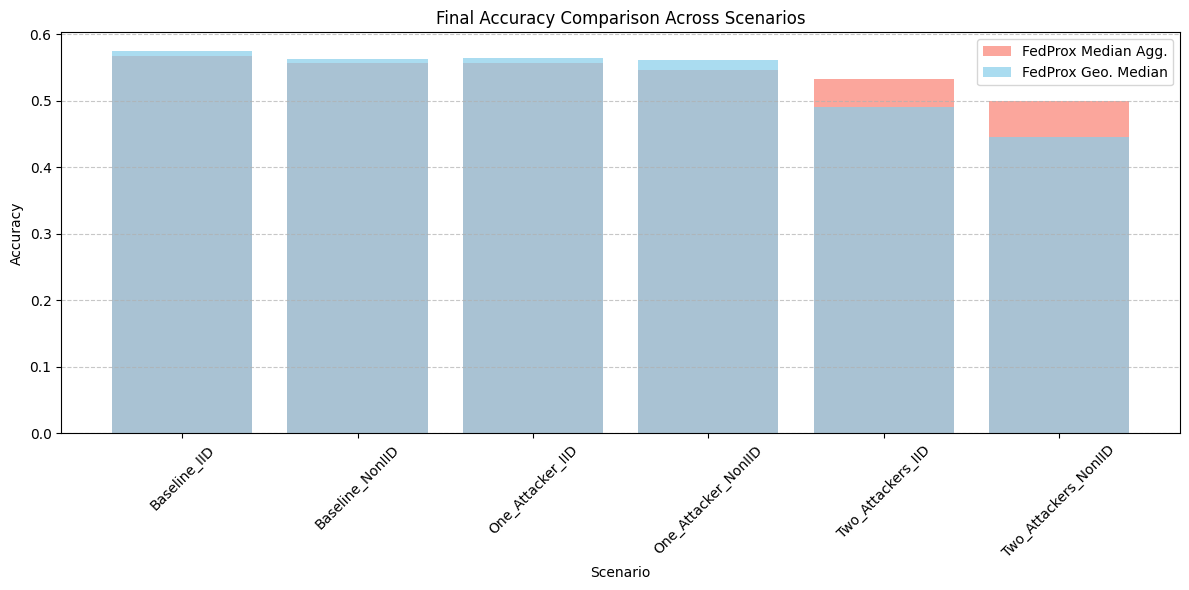

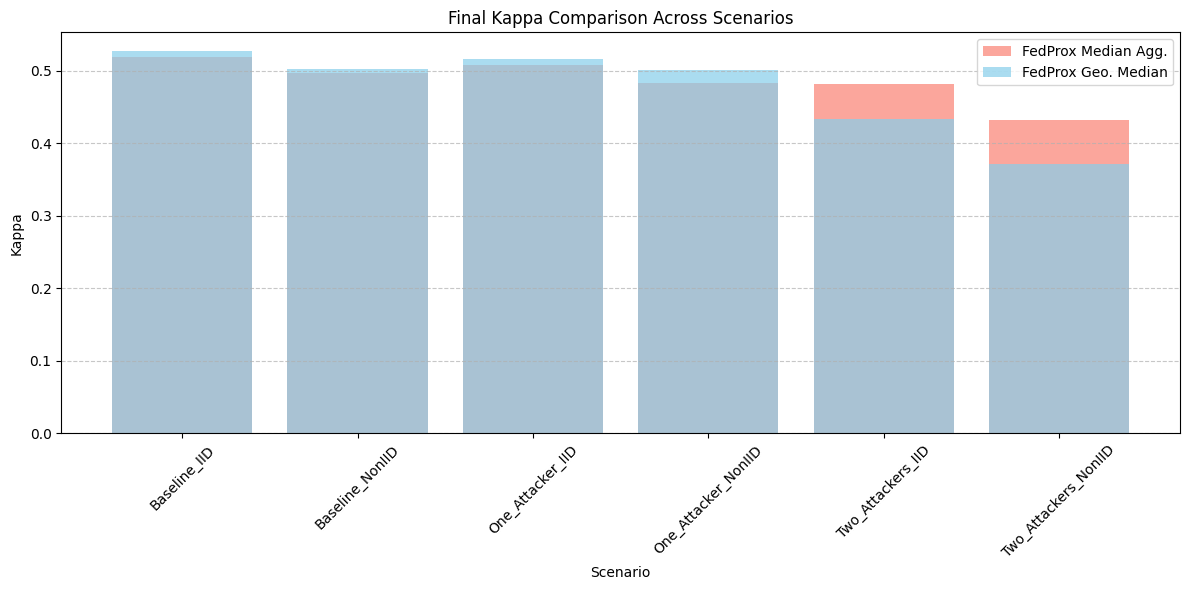

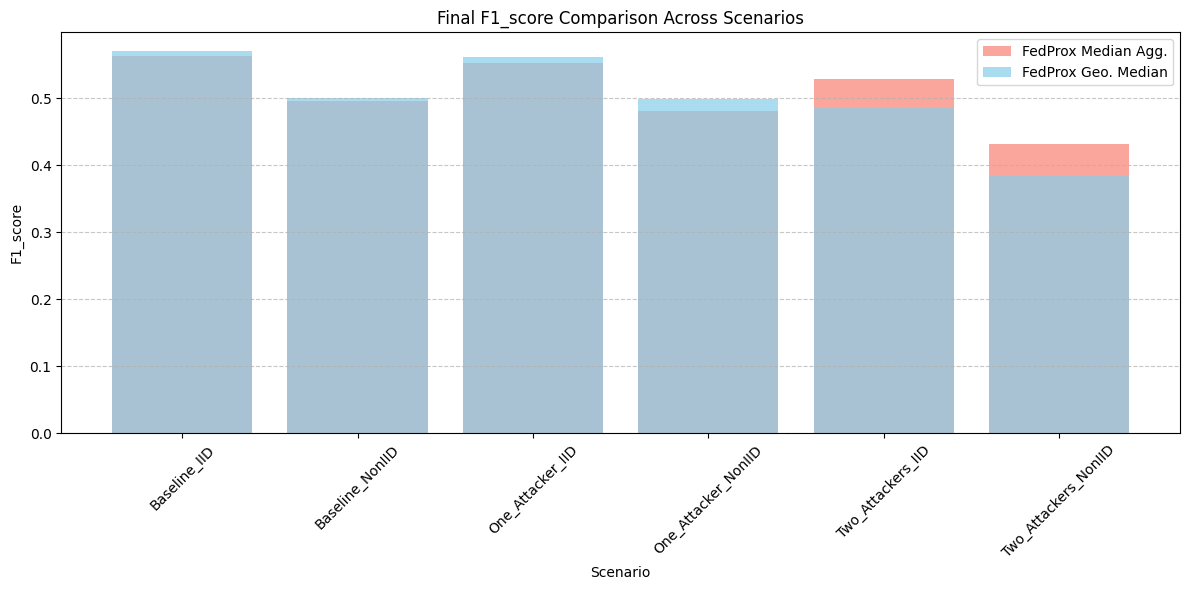

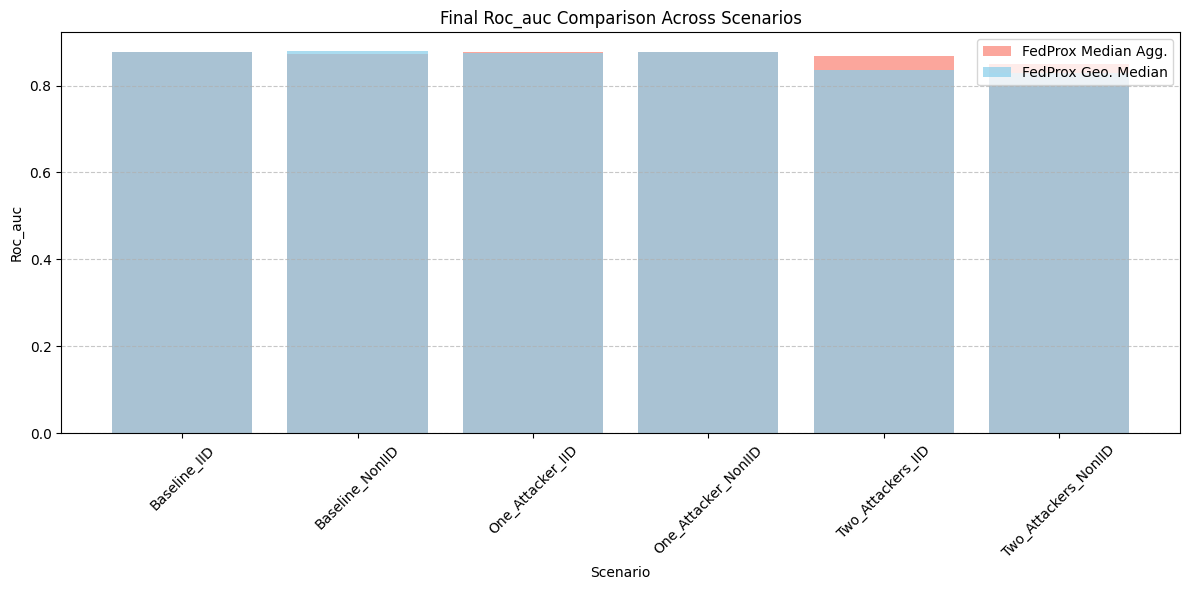

In [21]:
# Plot bar charts for final metrics across scenarios
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(12, 6))
    plt.bar(comparison_summary.index, comparison_summary[('FedProx Median Agg.', metric)], label='FedProx Median Agg.', color='salmon', alpha=0.7)
    plt.bar(comparison_summary.index, comparison_summary[('FedProx Geo. Median', metric)], label='FedProx Geo. Median', color='skyblue', alpha=0.7)

    plt.title(f'Final {metric.capitalize()} Comparison Across Scenarios')
    plt.xlabel('Scenario')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [22]:
# Define metrics
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']

# Filter for the final round(s)
final_round = fedprox_geometric_median_defense_data['rounds'].max()
fedprox_geometric_median_final = fedprox_geometric_median_defense_data[
    fedprox_geometric_median_defense_data['rounds'] == final_round
]
fedprox_median_aggregation_final = fedprox_median_aggregation_defense_data[
    fedprox_median_aggregation_defense_data['rounds'] == final_round
]

# Calculate mean metrics for the final round for both defense methods
geometric_median_mean_final = fedprox_geometric_median_final.groupby('Scenario').mean()[metrics]
median_aggregation_mean_final = fedprox_median_aggregation_final.groupby('Scenario').mean()[metrics]

# Calculate percentage improvement between defense methods
improvement_final = (geometric_median_mean_final - median_aggregation_mean_final) / median_aggregation_mean_final * 100

# Find the most interesting values: maximum improvement per metric
most_interesting_values_final = improvement_final.idxmax()  # Scenarios with the highest improvement per metric
most_interesting_results_final = improvement_final.max()    # Maximum improvement values per metric

# Combine into a summary DataFrame
interesting_summary_final = pd.DataFrame({
    "Metric": metrics,
    "Best Scenario": most_interesting_values_final.values,
    "Improvement (%)": most_interesting_results_final.values
})

# Display the most interesting results for the final round
print("Most Interesting Results Comparing Defense Methods (Final Round):")
print(interesting_summary_final)


Most Interesting Results Comparing Defense Methods (Final Round):
     Metric         Best Scenario  Improvement (%)
0  accuracy   One_Attacker_NonIID         2.480979
1     kappa   One_Attacker_NonIID         3.111005
2  f1_score   One_Attacker_NonIID         3.410530
3   roc_auc  Two_Attackers_NonIID         0.854841


In [28]:
# Define metrics and scenarios of interest
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']
scenarios_of_interest = ['One_Attacker_IID', 'One_Attacker_NonIID', 
                          'Two_Attackers_IID', 'Two_Attackers_NonIID']

# Filter for the final round(s) and the scenarios of interest
final_round = fedprox_geometric_median_defense_data['rounds'].max()
fedprox_geometric_median_final = fedprox_geometric_median_defense_data[
    (fedprox_geometric_median_defense_data['rounds'] == final_round) & 
    (fedprox_geometric_median_defense_data['Scenario'].isin(scenarios_of_interest))
]
fedprox_median_aggregation_final = fedprox_median_aggregation_defense_data[
    (fedprox_median_aggregation_defense_data['rounds'] == final_round) & 
    (fedprox_median_aggregation_defense_data['Scenario'].isin(scenarios_of_interest))
]

# Calculate mean metrics for the final round for selected scenarios
median_aggregation_mean_final = fedprox_median_aggregation_final.groupby('Scenario').mean()[metrics]
geometric_median_mean_final = fedprox_geometric_median_final.groupby('Scenario').mean()[metrics]

# Calculate percentage improvement for selected scenarios in the final round
improvement_final = (geometric_median_mean_final - median_aggregation_mean_final) / median_aggregation_mean_final * 100

# Reorder to highlight improvement first
comparison_summary_reordered = pd.concat([
    improvement_final,  # Improvement %
    geometric_median_mean_final,  # Final Mean for Geometric Median Defense
    median_aggregation_mean_final  # Final Mean for Median Aggregation Defense
], keys=['Improvement (%)', 
         'FedProx + Geometric Median Final Mean', 
         'FedProx + Median Aggregation Final Mean'], axis=1)

# Display the reordered comparison summary for selected scenarios
print("Reordered Comparison Summary: FedProx + Median Aggregation vs. FedProx + Geometric Median Defense (Final Round)")
print(comparison_summary_reordered)


Reordered Comparison Summary: FedProx + Median Aggregation vs. FedProx + Geometric Median Defense (Final Round)
                     Improvement (%)                                  \
                            accuracy      kappa   f1_score   roc_auc   
Scenario                                                               
One_Attacker_IID            0.515796   0.596442   0.933667 -1.190697   
One_Attacker_NonIID         2.480979   3.111005   3.410530 -1.236591   
Two_Attackers_IID          -9.533469 -11.446695  -8.573747 -4.756351   
Two_Attackers_NonIID      -14.275415 -17.787120 -14.272402  0.854841   

                     FedProx + Geometric Median Final Mean            \
                                                  accuracy     kappa   
Scenario                                                               
One_Attacker_IID                                  0.623600  0.581626   
One_Attacker_NonIID                               0.619228  0.564845   
Two_Attackers_IID      

In [32]:
#import fedprox data
fedprox_path = 'FedProx_combined_metrics.csv'
fedprox_data = pd.read_csv(fedprox_path)

In [33]:
# Key metrics and scenarios
metrics = ['accuracy', 'f1_score']
scenarios_of_interest = ['Two_Attackers_IID', 'Two_Attackers_NonIID']

# Filter for the final round(s)
final_round = fedprox_data['rounds'].max()
fedprox_final = fedprox_data[(fedprox_data['rounds'] == final_round) & 
                             (fedprox_data['Scenario'].isin(scenarios_of_interest))]
fedprox_geometric_median_final = fedprox_geometric_median_defense_data[
    (fedprox_geometric_median_defense_data['rounds'] == final_round) & 
    (fedprox_geometric_median_defense_data['Scenario'].isin(scenarios_of_interest))]
fedprox_median_aggregation_final = fedprox_median_aggregation_defense_data[
    (fedprox_median_aggregation_defense_data['rounds'] == final_round) & 
    (fedprox_median_aggregation_defense_data['Scenario'].isin(scenarios_of_interest))]

# Calculate mean metrics
fedprox_mean = fedprox_final.groupby('Scenario').mean()[metrics]
geom_median_mean = fedprox_geometric_median_final.groupby('Scenario').mean()[metrics]
median_agg_mean = fedprox_median_aggregation_final.groupby('Scenario').mean()[metrics]

# Improvements over baseline
improv_geom = (geom_median_mean - fedprox_mean) / fedprox_mean * 100
improv_median_agg = (median_agg_mean - fedprox_mean) / fedprox_mean * 100

# Defense comparison
defense_comparison = (geom_median_mean - median_agg_mean) / median_agg_mean * 100

# Summary
baseline_comparison = pd.concat([fedprox_mean, geom_median_mean, improv_geom, median_agg_mean, improv_median_agg],
                                 keys=['Baseline', 'Geom Median', 'Improvement (Geom Median)', 
                                       'Median Agg', 'Improvement (Median Agg)'], axis=1)

defense_summary = pd.concat([median_agg_mean, geom_median_mean, defense_comparison], 
                             keys=['Median Agg Mean', 'Geom Median Mean', 'Difference (%)'], axis=1)

print("Baseline Comparison:")
print(baseline_comparison)
print("\nDefense Comparison:")
print(defense_summary)


Baseline Comparison:
                      Baseline           Geom Median            \
                      accuracy  f1_score    accuracy  f1_score   
Scenario                                                         
Two_Attackers_IID     0.488600  0.493303    0.535200  0.537651   
Two_Attackers_NonIID  0.418949  0.368817    0.475315  0.418284   

                     Improvement (Geom Median)           Median Agg            \
                                      accuracy  f1_score   accuracy  f1_score   
Scenario                                                                        
Two_Attackers_IID                     9.537454   8.99006   0.591600  0.588071   
Two_Attackers_NonIID                 13.454198  13.41256   0.554467  0.487922   

                     Improvement (Median Agg)             
                                     accuracy   f1_score  
Scenario                                                  
Two_Attackers_IID                   21.080639  19.210901  
Two_At

### Final Round Analysis: Comparison of Defense Methods

#### **1. Baseline Comparison**
The following table compares the performance of the two defense methods (Geometric Median and Median Aggregation) against the baseline FedProx for the final round. It highlights accuracy and F1-score improvements for scenarios with two attackers under IID and Non-IID conditions.

| **Scenario**            | **FedProx Baseline** | **Geometric Median Defense** | **Improvement (Geometric Median vs. Baseline)** | **Median Aggregation Defense** | **Improvement (Median Aggregation vs. Baseline)** |
|--------------------------|----------------------|------------------------------|-----------------------------------------------|---------------------------------|-----------------------------------------------|
| **Two_Attackers_IID**    | Accuracy: 0.4886    | Accuracy: 0.5352            | +9.54%                                        | Accuracy: 0.5916              | +21.08%                                      |
|                          | F1-Score: 0.4933    | F1-Score: 0.5377            | +8.99%                                        | F1-Score: 0.5881              | +19.21%                                      |
| **Two_Attackers_NonIID** | Accuracy: 0.4189    | Accuracy: 0.4753            | +13.45%                                       | Accuracy: 0.5545              | +32.35%                                      |
|                          | F1-Score: 0.3688    | F1-Score: 0.4183            | +13.41%                                       | F1-Score: 0.4879              | +32.29%                                      |

---

#### **2. Defense Method Comparison**
This table compares the performance of the two defense methods directly for the final round, showing relative differences in performance.

| **Scenario**            | **Median Aggregation Defense** | **Geometric Median Defense** | **Difference (Geometric Median vs. Median Aggregation)** |
|--------------------------|-------------------------------|------------------------------|---------------------------------------------------------|
| **Two_Attackers_IID**    | Accuracy: 0.5916             | Accuracy: 0.5352            | -9.53%                                                  |
|                          | F1-Score: 0.5881             | F1-Score: 0.5377            | -8.57%                                                  |
| **Two_Attackers_NonIID** | Accuracy: 0.5545             | Accuracy: 0.4753            | -14.28%                                                 |
|                          | F1-Score: 0.4879             | F1-Score: 0.4183            | -14.27%                                                 |

---

### **Key Insights**
1. **Against the Baseline:**
   - Both defenses improve performance significantly over the baseline FedProx.
   - **Median Aggregation consistently outperforms Geometric Median Defense**, offering:
     - **Higher accuracy**: Up to +32.35% improvement for Non-IID scenarios.
     - **Better F1-scores**: Up to +32.29% improvement for Non-IID scenarios.

2. **Between the Defenses:**
   - **Median Aggregation performs better** than Geometric Median Defense in all scenarios.
   - **Geometric Median Defense lags significantly**, especially under Non-IID conditions, with:
     - ~-14% lower accuracy and F1-scores compared to Median Aggregation.

---

### **Recommendations**
1. **Adopt Median Aggregation Defense**: It offers better resilience to adversarial attacks, especially for Non-IID distributions.
2. **Consider Scenario-Specific Strategies**: For IID scenarios, both defenses perform adequately, but Median Aggregation still has a noticeable edge.
3. **Investigate Further**:
   - Examine results across multiple rounds to ensure the observed trends are consistent.
   - Explore the root cause of Geometric Median’s underperformance in Non-IID scenarios.
   - Test hybrid defenses combining strengths of both methods.
